In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from tensorflow.keras.utils import to_categorical

In [3]:
train=pd.read_csv('./Sign Language MNIST/sign_mnist_train.csv')#lecture de fichier train
test=pd.read_csv('./Sign Language MNIST/sign_mnist_test.csv')#lecture de fichier test

In [4]:
train.head() # afficher les 5 premières lignes

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
features=np.array(train.columns[1:]) # choisir les features (colonnes de X)
label=np.array(train.columns[0]) # choisir label (colonne de y)

In [6]:
# mettre le dataframe en variables

x_train=np.array(train[features])
y_train=np.array(train[label])
x_test=np.array(test[features])
y_test=np.array(test[label])


In [7]:
# fixer les types de variable

train_data_np = np.array(train, dtype = 'float32')
test_data_np = np.array(test, dtype='float32')

In [8]:
# afficher les dimms de dataFrames  
print(train_data_np.shape)
print(test_data_np.shape)

(27455, 785)
(7172, 785)


In [9]:
# specifier les vrais resultats car la colonne "label" contient l'indice des caracteres dans l'alphabet
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [10]:
train_data_np

array([[  3., 107., 118., ..., 204., 203., 202.],
       [  6., 155., 157., ..., 103., 135., 149.],
       [  2., 187., 188., ..., 195., 194., 195.],
       ...,
       [ 18., 174., 174., ..., 202., 200., 200.],
       [ 17., 177., 181., ...,  64.,  87.,  93.],
       [ 23., 179., 180., ..., 205., 209., 215.]], dtype=float32)

lettre pour cette image:  A 0.0


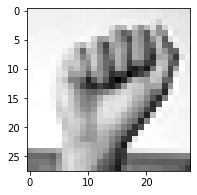

In [12]:
# afficher une image par en specifiant le caractere voulu
while True:
    i = random.randint(1,train.shape[0])
    if(class_names[int(train_data_np[i,0])]=='A'):
        fig1, ax1 = plt.subplots(figsize=(3,3))
        plt.imshow(train_data_np[i,1:].reshape((28,28)),cmap="gray") 
        print("lettre pour cette image: ", class_names[int(train_data_np[i,0])],train_data_np[i,0])
        break

lettre pour cette image:  Y 24.0


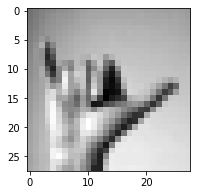

In [13]:
# afficher une image par en specifiant l'indice du caractere voulu
while True:
    i = random.randint(1,train.shape[0])
    if(int(train_data_np[i,0])==24):
        fig1, ax1 = plt.subplots(figsize=(3,3))
        plt.imshow(train_data_np[i,1:].reshape((28,28)),cmap="gray") 
        print("lettre pour cette image: ", class_names[int(train_data_np[i,0])],train_data_np[i,0])
        break

In [14]:
# afficher l'occurance de chaque caractere dans les données de test
test['label'].value_counts()
# on peut remarquer qu'il manque aux données les caractères "Z" et "J"

4     498
7     436
1     432
12    394
6     348
15    347
21    346
24    332
0     331
10    331
2     310
13    291
8     288
23    267
20    266
19    248
5     247
14    246
18    246
3     245
11    209
22    206
16    164
17    144
Name: label, dtype: int64

Text(0.5, 1.0, 'Label')

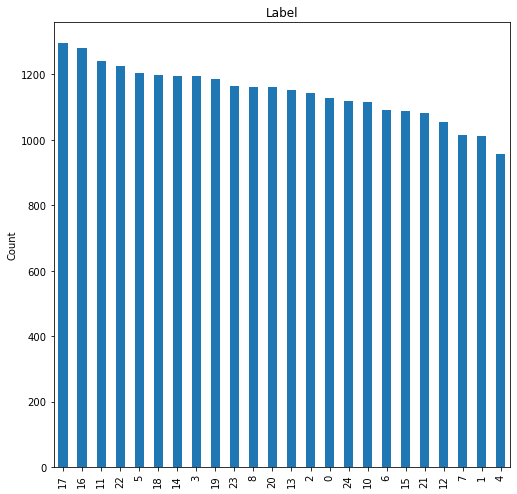

In [15]:
# afficher l'histogramme de l'occurance de chaque indice caractere dans les données de train
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

24


<BarContainer object of 24 artists>

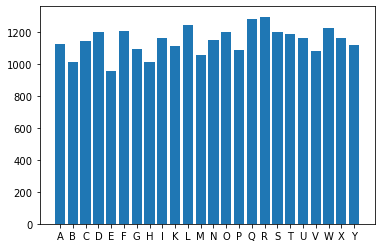

In [16]:
# afficher l'histogramme de l'occurance de chaque caractere dans les données de train
k=train['label'].value_counts()
a=dict()
print(len(k))
for i in range(len(k)+1):
    try:
        a[class_names[i]]=k[i]
    except(Exception ):
        pass

plt.bar(a.keys(),a.values())


In [17]:
# normalisation des valeurs en division par 255

x_train = train_data_np[:, 1:] /255.
x_test = test_data_np[:, 1:] /255.

In [18]:
# voir la différence entre avant et après normalisation

print(train_data_np[:, 1:])
print("--------------------------------")
print(x_train)

[[107. 118. 127. ... 204. 203. 202.]
 [155. 157. 156. ... 103. 135. 149.]
 [187. 188. 188. ... 195. 194. 195.]
 ...
 [174. 174. 174. ... 202. 200. 200.]
 [177. 181. 184. ...  64.  87.  93.]
 [179. 180. 180. ... 205. 209. 215.]]
--------------------------------
[[0.41960785 0.4627451  0.49803922 ... 0.8        0.79607844 0.7921569 ]
 [0.60784316 0.6156863  0.6117647  ... 0.40392157 0.5294118  0.58431375]
 [0.73333335 0.7372549  0.7372549  ... 0.7647059  0.7607843  0.7647059 ]
 ...
 [0.68235296 0.68235296 0.68235296 ... 0.7921569  0.78431374 0.78431374]
 [0.69411767 0.70980394 0.72156864 ... 0.2509804  0.34117648 0.3647059 ]
 [0.7019608  0.7058824  0.7058824  ... 0.8039216  0.81960785 0.84313726]]


In [19]:
# transformer chaque label de train en vecteur de catégorie

y_train = train_data_np[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

In [20]:
# voir la différence entre avant et après catégorisation

print(y_train)
print("-------------------------")
print(y_train_cat)

[ 3.  6.  2. ... 18. 17. 23.]
-------------------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [21]:
# transformer chaque label de test en vecteur de catégorie

y_test = test_data_np[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

In [22]:
# reshape les données du (nb_ligne,785,1) en (nb_ligne,28,28,1)

x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))

In [24]:
print(x_train.shape)
print('-----------------------')
print(x_test.shape)

(27455, 28, 28, 1)
-----------------------
(7172, 28, 28, 1)


In [127]:
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Dropout,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2,l1

In [131]:
# la structure du modèle, puis ajouter les couches internes
model1 = Sequential()
model1.add(Conv2D(32, (3, 3),padding="same", input_shape = (28,28,1), kernel_regularizer=l2(0.0002), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3, 3), padding="same" ,kernel_regularizer=l2(0.0002), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, (3, 3),padding="same" ,kernel_regularizer=l2(0.0002),  activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(25, activation = 'softmax'))



In [132]:
# compilation du premier modele
model1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
# afficher les informations sur la structure du modele
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 7, 7, 64)         

In [133]:
# Training du modele

history1 = model1.fit(x_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test_cat))

Epoch 1/10
215/215 [==============================] - 13s 59ms/step - loss: 1.9017 - acc: 0.4243 - val_loss: 0.7336 - val_acc: 0.7854
Epoch 2/10
215/215 [==============================] - 13s 59ms/step - loss: 0.4044 - acc: 0.8777 - val_loss: 0.3188 - val_acc: 0.9175
Epoch 3/10
215/215 [==============================] - 13s 60ms/step - loss: 0.2006 - acc: 0.9526 - val_loss: 0.2078 - val_acc: 0.9525
Epoch 4/10
215/215 [==============================] - 13s 59ms/step - loss: 0.1368 - acc: 0.9773 - val_loss: 0.2150 - val_acc: 0.9575
Epoch 5/10
215/215 [==============================] - 13s 59ms/step - loss: 0.1125 - acc: 0.9849 - val_loss: 0.1712 - val_acc: 0.9589
Epoch 6/10
215/215 [==============================] - 13s 60ms/step - loss: 0.0930 - acc: 0.9910 - val_loss: 0.1734 - val_acc: 0.9586
Epoch 7/10
215/215 [==============================] - 13s 59ms/step - loss: 0.0871 - acc: 0.9922 - val_loss: 0.1632 - val_acc: 0.9696
Epoch 8/10
215/215 [==============================] - 13s 60ms

In [134]:
# sauvegarder le modele

model1.save('saved_models/model1.hdf5')

In [135]:
# evaluation du modele

loss,accuracy=model1.evaluate(x_test,y_test_cat)

225/225 [==============================] - 1s 5ms/step - loss: 0.1487 - acc: 0.9649


In [138]:
# creation de la structure du deuxieme modèle, puis ajouter les couches internes

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(25, activation = 'softmax'))

In [139]:
# compilation du premier modele

model2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])

# afficher les informations sur la structure du modele

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 5, 5, 64)         

In [140]:
# training du deuxieme modele

history2 = model2.fit(x_train, y_train_cat, batch_size = 128, epochs = 20, verbose = 1, validation_data = (x_test, y_test_cat))

Epoch 1/20
215/215 [==============================] - 9s 38ms/step - loss: 2.5610 - acc: 0.2129 - val_loss: 1.4483 - val_acc: 0.5554
Epoch 2/20
215/215 [==============================] - 8s 38ms/step - loss: 1.0181 - acc: 0.6569 - val_loss: 0.7024 - val_acc: 0.7623
Epoch 3/20
215/215 [==============================] - 8s 38ms/step - loss: 0.5883 - acc: 0.7987 - val_loss: 0.4714 - val_acc: 0.8274
Epoch 4/20
215/215 [==============================] - 8s 39ms/step - loss: 0.3822 - acc: 0.8698 - val_loss: 0.3449 - val_acc: 0.8784
Epoch 5/20
215/215 [==============================] - 8s 38ms/step - loss: 0.2575 - acc: 0.9140 - val_loss: 0.2875 - val_acc: 0.8978
Epoch 6/20
215/215 [==============================] - 8s 39ms/step - loss: 0.1858 - acc: 0.9375 - val_loss: 0.2502 - val_acc: 0.9037
Epoch 7/20
215/215 [==============================] - 8s 38ms/step - loss: 0.1382 - acc: 0.9564 - val_loss: 0.2126 - val_acc: 0.9235
Epoch 8/20
215/215 [==============================] - 8s 38ms/step - 

In [141]:
# sauvegarder le modele

model2.save('saved_models/model2.hdf5')

In [143]:
# evaluation du modele

loss,accuracy=model2.evaluate(x_test,y_test_cat)

225/225 [==============================] - 1s 3ms/step - loss: 0.1924 - acc: 0.9449


In [144]:
# creation de la structure du troisieme modèle, puis ajouter les couches internes

model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(25, activation = 'softmax'))

In [145]:
# compilation du troisieme modele

model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])

# afficher les informations sur la structure du modele

model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 5, 5, 64)         

In [146]:
# training du troisieme modele

history3 = model3.fit(x_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test_cat))

Epoch 1/10
215/215 [==============================] - 8s 35ms/step - loss: 1.9540 - acc: 0.4358 - val_loss: 1.0063 - val_acc: 0.6741
Epoch 2/10
215/215 [==============================] - 7s 35ms/step - loss: 0.5475 - acc: 0.8349 - val_loss: 0.5269 - val_acc: 0.8388
Epoch 3/10
215/215 [==============================] - 7s 35ms/step - loss: 0.2575 - acc: 0.9240 - val_loss: 0.3822 - val_acc: 0.8847
Epoch 4/10
215/215 [==============================] - 7s 35ms/step - loss: 0.1385 - acc: 0.9633 - val_loss: 0.3326 - val_acc: 0.8921
Epoch 5/10
215/215 [==============================] - 7s 35ms/step - loss: 0.0862 - acc: 0.9793 - val_loss: 0.3096 - val_acc: 0.9049
Epoch 6/10
215/215 [==============================] - 7s 34ms/step - loss: 0.0601 - acc: 0.9863 - val_loss: 0.2861 - val_acc: 0.9110
Epoch 7/10
215/215 [==============================] - 8s 36ms/step - loss: 0.0407 - acc: 0.9920 - val_loss: 0.3261 - val_acc: 0.9098
Epoch 8/10
215/215 [==============================] - 8s 35ms/step - 

In [147]:
# sauvegarder le modele

model3.save('saved_models/model3.hdf5')

In [149]:
# evaluation du modele

loss,accuracy=model3.evaluate(x_test,y_test_cat)

225/225 [==============================] - 1s 3ms/step - loss: 0.2616 - acc: 0.9299


In [38]:
from keras.models import load_model
from sklearn.metrics import accuracy_score

In [39]:
# importer les trois modeles

model1 = load_model('./saved_models/model1.hdf5')
model2 = load_model('./saved_models/model2.hdf5')
model3 = load_model('./saved_models/model3.hdf5')

# regrouper les trois modeles

models = [model1, model2, model3]

In [40]:
# predire les données de test

preds = [model.predict(x_test) for model in models]
preds=np.array(preds)

# afficher les dims du predictions

print(preds.shape)

(3, 7172, 25)


In [41]:
# faire la sommes des vecteurs de chaque ligne (une valeur pour chaque modele)
summed = np.sum(preds, axis=0)
print(summed.shape)

(7172, 25)


In [42]:
#pour avoir l'indice du caractere à predire on prend l'indice du valeur maximale du vecteur de longeur 25

ensemble_prediction = np.argmax(summed, axis=1)
print(ensemble_prediction.shape)
print('---------------')

# afficher les prediction du 20 premieres ligne

print(ensemble_prediction[:20])

(7172,)
---------------
[ 6  5 10  0  3 21 10 14  3  7  8  8 21 12  7  4 22  0  7  7]


In [43]:
# predire pour chaque modele
prediction1 = model1.predict(x_test)
prediction2 = model2.predict(x_test)
prediction3 = model3.predict(x_test)

In [45]:
# afficher l'accuracy pour chaque modele et les comparer avec l'accuracy du regroupement des modeles
accuracy1 = accuracy_score(y_test, np.argmax(prediction1, axis=1))
accuracy2 = accuracy_score(y_test, np.argmax(prediction2, axis=1))
accuracy3 = accuracy_score(y_test, np.argmax(prediction3, axis=1))
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1 =  0.9648633575013943
Accuracy Score for model2 =  0.9449247071946458
Accuracy Score for model3 =  0.9298661461238148
Accuracy Score for average ensemble =  0.9691857222532069


In [49]:
# valeur réelle de la première ligne de x_test
y_test[0]

6.0

In [50]:
# prediction de la première ligne de x_test
ensemble_prediction[0]

6